In [5]:
%matplotlib inline

import os, pathlib
from importlib import reload
import logging, warnings
logging.basicConfig(level=logging.ERROR)
warnings.simplefilter("ignore")
import seaborn as sns

import PyPDF2 as ppdf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

import pyaldata as pyal

if "__file__" not in dir():
    try:
        NBPath = pathlib.Path.cwd()
        RepoPath = NBPath.parent
        os.chdir(RepoPath)

        from tools import utilityTools as utility
        from tools import dataTools as dt
        from tools import simTools as st
        import params
        reload(params)
        reload(st)
        monkey_defs = params.monkey_defs
        mouse_defs = params.mouse_defs
        rnn_defs = params.rnn_defs

        set_rc =  params.set_rc_params
        set_rc()
        root = params.root

        os.chdir(RepoPath / 'monkey')
        %run "_dataset-selection.ipynb"

    finally:
        os.chdir(NBPath)

    print('Done')

Done


In [21]:
seeds1 = rnn_defs.SEEDS1
seeds2 = rnn_defs.SEEDS2
sims = [6,2,3,1,4] #alpha = .05, .25, .5, 1.0, 2.0 ... 0.0
alphas = [0.0, 0.05, 0.25, 0.5, 1.0]

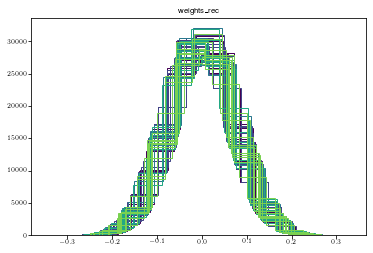

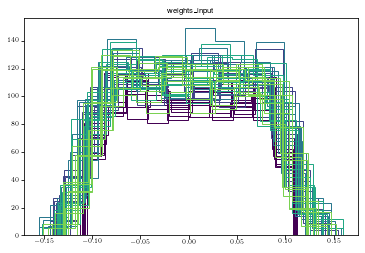

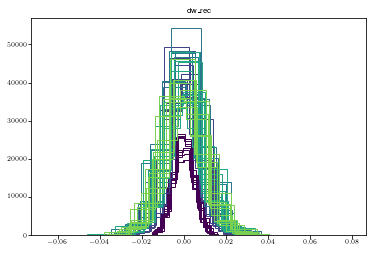

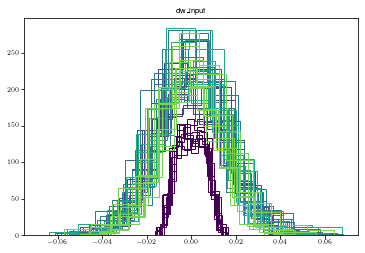

In [22]:
from sklearn.decomposition import PCA
from scipy.stats import kurtosis 

colors = utility.get_colors(len(sims), 'viridis')

rows = []
for w in ['weights','dw']:
    for layer in ['rec', 'input']:
        plt.figure()
        plt.title(w + '_'+layer)
        for i, sim in enumerate(sims):
            for seed in seeds2:    

                if w == 'weights':            
                    weights = st.get_weights(seed,sim)[layer]
                else:
                    weights = st.get_weight_changes(seed,sim)[layer]

                plt.hist(weights.flatten(), color = colors[i], histtype='step')

                #dimensionality
                pca = PCA().fit(weights)
                ex_var = pca.explained_variance_
                dimensionality = np.sum(ex_var) ** 2 / np.sum(ex_var ** 2)
                #standard dev
                var = np.var(weights.flatten())

                #kurtosis
                kurt = kurtosis(weights.flatten())


                dic = {
                    'weights': w,
                    'sim': sim,
                    'seed': seed,
                    'dimensionality': dimensionality,    
                    'var': var,
                    'kurtosis': kurt,  
                    'alpha': alphas[i],
                    'layer':layer,
                }

                rows.append(dic)

measures = pd.DataFrame(data = rows)

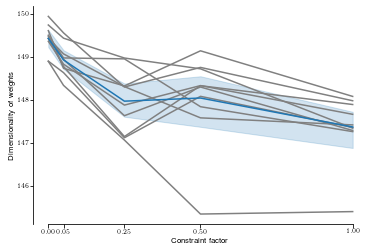

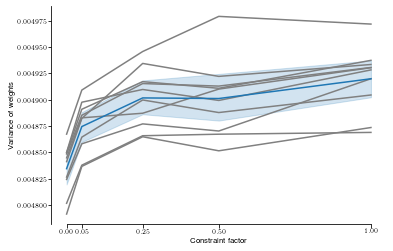

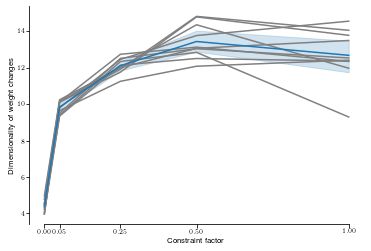

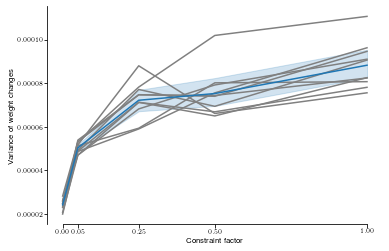

In [27]:
import seaborn as sns


for w, weight_label in zip(['weights', 'dw'], ['weights', 'weight changes']):
    data = measures[(measures.weights == w) & (measures.layer == 'rec')]
    for measure, label in zip(['dimensionality', 'var'], ['Dimensionality', 'Variance']):
        fig, ax = plt.subplots()
        for seed in seeds2:
            data_ = data[data.seed == seed]
            sns.lineplot(data = data_, x = 'alpha', y = measure, color = 'grey')
        sns.lineplot(data = data, x = 'alpha', y = measure)

        ax.set_xlabel('Constraint factor')
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        # # ax.set_title(f'{defs.areas[2]} Alignment')
        # ax.legend(loc=(.55,.67))
        ax.set_ylabel(f'{label} of {weight_label}')

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # ax.spines['bottom'].set_bounds([1,defs.n_components])
        ax.spines['bottom'].set_bounds([0,1])
        plt.xticks(alphas)
        info = '_'.join([w, measure])
        plt.savefig(params.figPath / ("vary_alpha_"+info+'.pdf'), format= 'pdf')


,sim,seed,dimensionality
0,0,0,148.910415
1,0,1,149.435335
2,0,2,149.514280
3,0,3,149.490427
4,0,4,149.445169


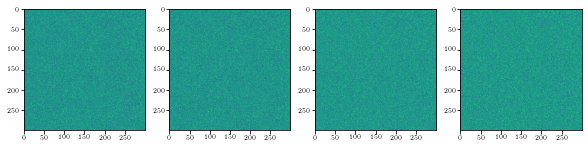

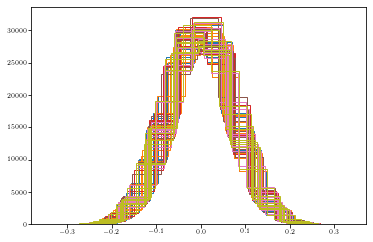

In [16]:
from sklearn.decomposition import PCA
fig,axs = plt.subplots(ncols=4, figsize = (10,3))
for i in range(4):
    axs[i].imshow(all_weights[i,0,:,:])

plt.figure()
colors = utility.get_colors(all_weights.shape[0], 'tab10')

rows = []
for sim in range(all_weights.shape[0]):
    for seed in range(all_weights.shape[1]):

        weights = all_weights[sim,seed,:,:]
        plt.hist(weights.flatten(), color = colors[sim], histtype='step')
        pca = PCA().fit(weights)
        ex_var = pca.explained_variance_

        dimensionality = np.sum(ex_var) ** 2 / np.sum(ex_var ** 2)

        dic = {
            'sim': sim,
            'seed': seed,
            'dimensionality': dimensionality,
        }

        rows.append(dic)

measures = pd.DataFrame(data = rows)
measures.head()